In [2]:
#google
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
#import packages
import os
import tensorflow as tf
import keras
from keras import layers
from keras.models import Model
from keras import optimizers
from keras.layers import Dropout, Flatten, Dense, BatchNormalization, GlobalAveragePooling2D
from sklearn.preprocessing import LabelBinarizer
from keras.callbacks import ModelCheckpoint
from keras.optimizers import RMSprop, SGD, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet import ResNet50

Using TensorFlow backend.


In [0]:
#load dataset
train_path = '/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment_2/dataset1/train/' #80
valid_path = '/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment_2/dataset1/val/' #10
test_path = '/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment_2/dataset1/test/' #10

In [0]:
#ImageGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
#datagen flow for multi-class
train_generator = train_datagen.flow_from_directory(train_path, target_size=(224,224),
    class_mode='categorical', batch_size=8)
valid_generator = test_datagen.flow_from_directory(valid_path, target_size=(224,224),
    class_mode='categorical', batch_size=8)
test_generator = test_datagen.flow_from_directory(test_path, target_size=(224,224),
    class_mode='categorical', batch_size=8)

Found 900 images belonging to 4 classes.
Found 113 images belonging to 4 classes.
Found 112 images belonging to 4 classes.


In [0]:
#resnet101
model = ResNet50(weights= None, include_top = True, classes = 4)

In [0]:
#compile model
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=1e-5), metrics=['acc'])

In [9]:
#train model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  
      epochs=25,
      validation_data=valid_generator,
      validation_steps=10,  
      verbose=1)

Epoch 1/25
100/100 [==============================] - 445s 4s/step - loss: 1.5342 - acc: 0.4146 - val_loss: 1.2658 - val_acc: 0.3000
Epoch 2/25
100/100 [==============================] - 102s 1s/step - loss: 0.9813 - acc: 0.6093 - val_loss: 2.2233 - val_acc: 0.2740
Epoch 3/25
100/100 [==============================] - 52s 519ms/step - loss: 0.8020 - acc: 0.6935 - val_loss: 0.3681 - val_acc: 0.2192
Epoch 4/25
100/100 [==============================] - 52s 519ms/step - loss: 0.7357 - acc: 0.6975 - val_loss: 1.8195 - val_acc: 0.4250
Epoch 5/25
100/100 [==============================] - 52s 518ms/step - loss: 0.7326 - acc: 0.7109 - val_loss: 1.3980 - val_acc: 0.4384
Epoch 6/25
100/100 [==============================] - 52s 520ms/step - loss: 0.6500 - acc: 0.7437 - val_loss: 5.0821 - val_acc: 0.6575
Epoch 7/25
100/100 [==============================] - 52s 518ms/step - loss: 0.5836 - acc: 0.7854 - val_loss: 0.6118 - val_acc: 0.8125
Epoch 8/25
100/100 [==============================] - 52s 5

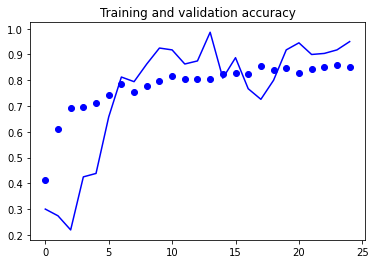

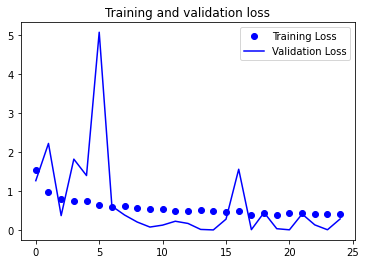

In [11]:
#plot graph
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()